In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [19]:
#  LOAD AND SPLIT DATASET
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

[3]
x_train shape: (50000, 32, 32, 3)


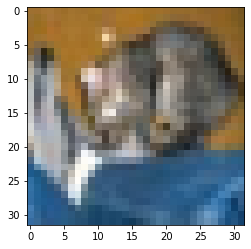

In [20]:
img = plt.imshow(x_test[0])
print(y_test[0])
print('x_train shape:', x_train.shape)


In [25]:
from tensorflow import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [26]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [27]:
#Downloaded the dataset and visualize the images
#Changed the label to one-hot encodings
#Scale the image pixel values to take between 0 and 1

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [31]:
#we call an ‘empty’ sequential model
model = Sequential()

In [32]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [33]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))


In [34]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [35]:
model.add(Dropout(0.25))


In [36]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [37]:
model.add(Flatten())


In [38]:
model.add(Dense(512, activation='relu'))


In [39]:
model.add(Dropout(0.5))


In [40]:
model.add(Dense(10, activation='softmax'))


In [41]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [73]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=1, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
40000/40000 [==============================] - 175s 4ms/sample - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0952


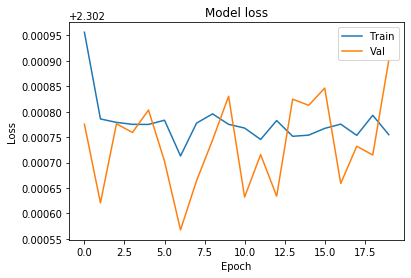

In [46]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

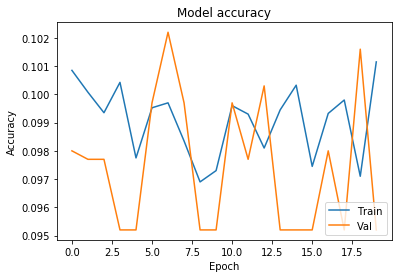

In [49]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [51]:
model.evaluate(x_test, y_test_one_hot)[1]


10000/10000 [==============================] - 8s 814us/sample - loss: 2.3027 - accuracy: 0.1000


0.1

In [52]:
model.save('my_cifar10_model.h5')

In [53]:
#from keras.models import load_model
#model = load_model('my_cifar10_model.h5')

In [56]:
my_image = plt.imread("img.jpg")


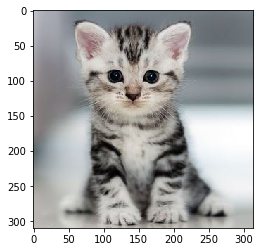

In [59]:
plt.imshow(my_image)

In [60]:
from skimage.transform import resize


In [61]:
my_image_resized = resize(my_image, (32,32,3))


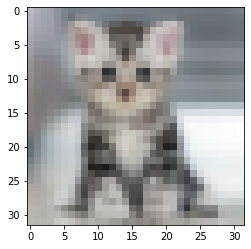

In [62]:
img = plt.imshow(my_image_resized)


In [63]:
import numpy as np


In [67]:
probabilities = model.predict(np.array( [my_image_resized,] ))


In [68]:
probabilities


array([[0.07789019, 0.11187755, 0.10697965, 0.08020695, 0.10159699,
        0.09281818, 0.10902677, 0.09887403, 0.0961736 , 0.12455603]],
      dtype=float32)

In [69]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: truck -- Probability: 0.124556035
Second most likely class: automobile -- Probability: 0.11187755
Third most likely class: frog -- Probability: 0.10902677
Fourth most likely class: bird -- Probability: 0.106979646
Fifth most likely class: deer -- Probability: 0.10159699


In [72]:
import os
model_name = 'keras_cifar10_trained_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/ashutoshjha/Desktop/Projects/ML-DL/ML/saved_models/keras_cifar10_trained_model.h5 
